In [49]:
#Heatmaps of parsed SRA data.



In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.stats import spearmanr
rcParams.update({'figure.autolayout': True})
sns.set(font='arial')
sns.set_style("white")
sns.set_style("ticks")
%matplotlib inline
#Palettes are generated with :sns.color_palette("hls", 23).as_hex()

In [6]:
covmat = pd.read_csv("../data/Pcoa/flembee_sra_df_coverage_lengthnorm.tsv.gz",sep=",",index_col=0, compression='gzip')
covmat.head()

,BP10_NODE_183_length_2151_cov_1_652217,BP10_NODE_253_length_1698_cov_0_733672,BP10_NODE_316_length_1451_cov_0_490977,BP10_NODE_382_length_1274_cov_0_352125,BP10_NODE_548_length_1036_cov_0_413115,BP10_NODE_575_length_1007_cov_0_694131,BP10_NODE_609_length_976_cov_0_792982,BP10_NODE_695_length_913_cov_0_313131,BP10_NODE_705_length_903_cov_0_225064,BP10_NODE_815_length_819_cov_0_133238,...,SRR955374.Contig_21333_11.3454_length_1948,SRR955374.Contig_21409_10.3538_length_1012,SRR955374.Contig_22608_10.6689_length_1192,SRR974922.Contig_2139_93.6595_length_6328,SRR974922.Contig_11618_267.764_length_12229,SRR974922.Contig_13208_545.549_length_12000,SRR974922.Contig_13965_4.476_length_1020,SRR974923.Contig_8427_36.9394_length_2395,SRR974923.Contig_24030_37.9485_length_2041,SRR974923.Contig_25646_47.5478_length_940
DRR028884,0.000000,0.000000,0.0,0.0,0.001931,0.000000,0.0,0.000000,0.0,0.0,...,0.001027,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000980,0.0
DRR028889,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
DRR028891,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
DRR029066,0.005579,0.010601,0.0,0.0,0.000000,0.003972,0.0,0.000000,0.0,0.0,...,0.007187,0.0,0.000000,0.018331,0.000000,0.102833,0.0,0.000835,0.003920,0.0
DRR029067,0.002789,0.007067,0.0,0.0,0.003861,0.000000,0.0,0.002191,0.0,0.0,...,0.008214,0.0,0.001678,0.025284,0.000164,0.103333,0.0,0.000835,0.038217,0.0


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 5760x5760 with 0 Axes>

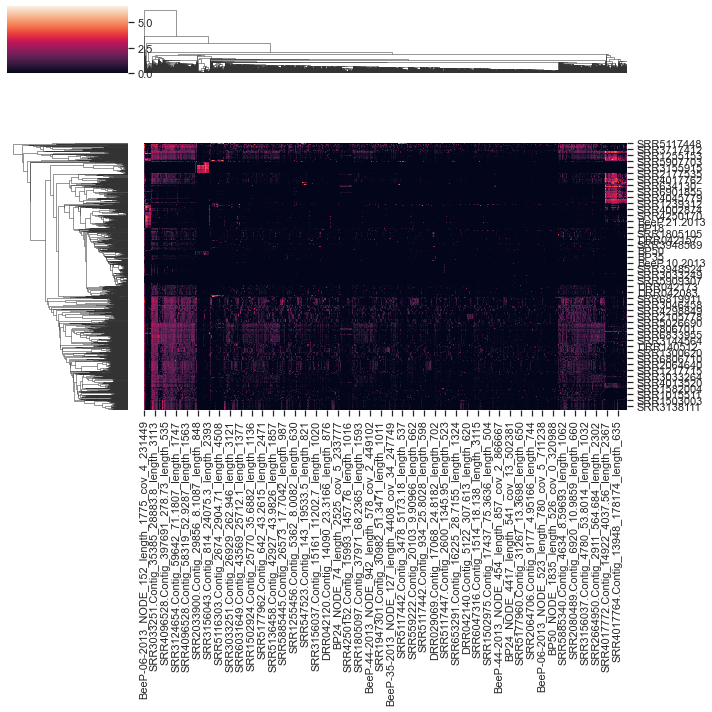

In [7]:
#Clustermap for a quick look, multiply length norm. counts w/ 189 (average read len) + log transform.
covmat_log = np.log10(covmat*189 + 1)
plt.figure(figsize=(80,80))
g = sns.clustermap(covmat_log)
g

In [9]:
#Grab the index for merging.
sradf_denovo = covmat_log
sradf_denovo['dataset'] = sradf_denovo.index
#Get metadata:
metadat = pd.read_csv("../data/Metadata_location_year_study_kind.csv", sep=";")
loctax = metadat[metadat.columns.intersection(['Run','ISO3','Tax_family'])]
loctax.columns = ['dataset','Tax','ISO3']
loctax
#Merge 2 df's:
sradf_denovo_loctax = pd.merge(sradf_denovo, loctax, on='dataset')
sradf_denovo_loctax.index = sradf_denovo_loctax['dataset']
del sradf_denovo_loctax['dataset']
sradf_denovo_loctax2 = sradf_denovo_loctax
###################################################### Taxonomical family: ###################################################
#### in order of which the unique spills them out!
#### Cutoff = 10

## Formicidae: #db5f57
## Apidae: #dbb757
## Orussidae: gray
## Cynipidae: gray
## Vespidae: #a7db57
## Trichogammatidae: gray
## Ichneumonidae: gray
## Agaonidae: gray
## Platygastridae: gray
## Ceraphronidae: gray
## Eurytomidae: gray
## Crabronidae: gray
## Aphelinidae: gray
## Halictidae: #57db5f
## Ampulicidae: gray
## Masaridae: gray
## Braconidae: #57dbb7
## Colletidae: gray
## Cimbicidae: gray
## Megachilidae: #57a7db
## Torymidae: gray
## Encyrtidae: gray
## Pteromalidae: #5f57db
## Cephidae: #b757db
## Eupelmidae: gray
## Figitidae: #db57a7
## Eulophidae: gray
## Hymenoptera: gray
## Siricidae: gray


tax = sradf_denovo_loctax2['Tax']
taxcolmap = dict(zip(list(sradf_denovo_loctax2['Tax'].unique()), ['#db5f57','#dbb757','#808080','#808080', '#a7db57', '#808080', '#808080', '#808080','#808080','#808080','#808080','#808080','#808080','#57db5f','#808080','#808080','#57dbb7','#808080','#808080','#57a7db','#808080','#808080','#5f57db','#b757db','#808080','#db57a7','#808080','#808080','#808080']))
rowcol1 = tax.map(taxcolmap)


###################################################### Location: ###################################################
#### in order of which the unique spills them out!
#### Cutoff = 20
## JPN : #808080
## GUF : #db5f57
## USA : #dba157
## FIN : #d3db57
## ESP : #808080
## FRA : #808080
## TUR : #808080
## DNK : #808080
## nan : #808080
## PAN : #91db57
## GBR : #808080
## IND : #808080
## CZE : #808080
## BRA : #57db5f
## KOR : #808080
## CHN : #57dba1
## ISR : #808080
## ZAF : #57d3db
## DEU : #5791db
## HND : #808080
## CHE : #5f57db
## GRC : #808080
## AUS : #a157db
## SWE : #808080
## ITA : #808080
## NZL : #808080
## CAN : #808080
## MEX : #808080
## NLD : #db57d3
## PER : #808080
## BEL : #db5791
## SVN : #808080
## AUT : #808080
## TON : #808080
## CHL : #808080
## GEO : #808080
## CRI : #808080
## CIV : #808080
## SYR : #808080
## DZA : #808080

loc = sradf_denovo_loctax2['ISO3']
loccolmap = dict(zip(list(sradf_denovo_loctax2['ISO3'].unique()), ['#808080','#db5f57','#dba157','#d3db57','#808080','#808080','#808080','#808080','#808080','#91db57','#808080','#808080','#808080','#57db5f','#808080','#57dba1','#808080','#57d3db','#5791db','#5f57db','#808080','#a157db','#808080','#808080','#808080','#808080','#808080','#db57d3','#808080','#db5791','#808080','#808080','#808080','#808080','#808080','#808080','#808080','#808080','#808080']))
rowcol2 = loc.map(loccolmap)

#Remove these columns.
del sradf_denovo_loctax2['Tax']
del sradf_denovo_loctax2['ISO3']

row_colors = pd.concat([rowcol1,rowcol2],axis=1)
row_colors.columns = ['TaxFamily','Country']
row_colors

outputdf = pd.concat([loc,tax], axis=1)
outputdf.columns = ['Country','TaxFamily']
outputdf.to_csv("../data/notebooks_out/acc_EUtax_Country.csv", sep=",")

<Figure size 5760x5760 with 0 Axes>

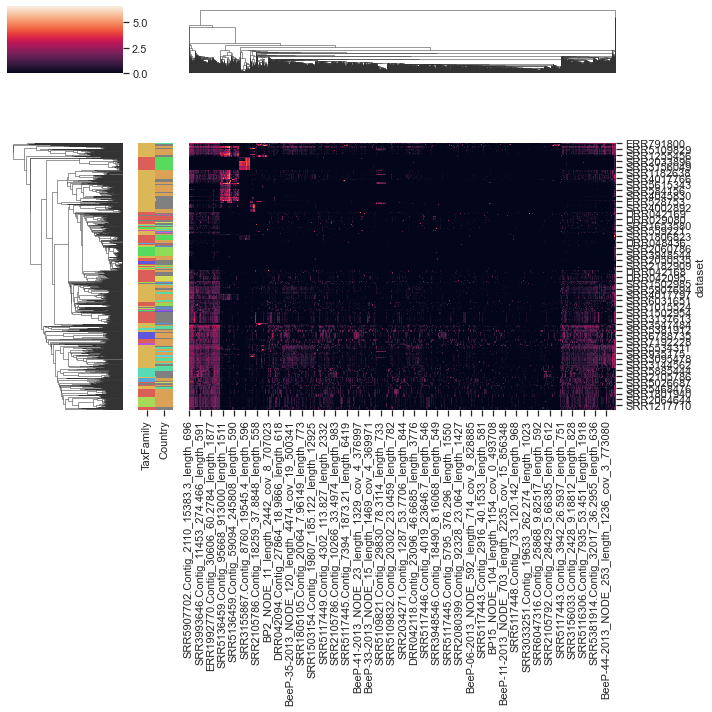

In [10]:
#Plot with rowcols.
plt.figure(figsize=(80,80))
g = sns.clustermap(sradf_denovo_loctax2, row_colors=row_colors)

In [14]:
# Now the colcols: (viral taxonomy)
meta_bee = pd.read_csv('../data/notebooks_out/viral_df_taxonomy.csv', index_col=0)
meta_sra = pd.read_csv('../data/notebooks_out/viral_df_taxonomy_SRA.csv', index_col=0)

meta_virtax = pd.concat([meta_bee,meta_sra])
meta_virtax = meta_virtax[meta_virtax.index.isin(list(sradf_denovo_loctax2.columns))]

In [16]:
#Remove 1 contig from mapping thats excluded later (was a phage): 'BeeP-11-2013_NODE_805_length_2072_cov_8_425063'
del sradf_denovo_loctax2['BeeP-11-2013_NODE_805_length_2072_cov_8_425063']

In [17]:
#Quick check if everything is sane:
len(sradf_denovo_loctax2.columns) == len(meta_virtax.index)

True

In [18]:
# Color mapping:
#### Viral taxonomy:
# In order of unique output ofcourse:
#### Cutoff = 100

## Tymovirales : #ff7f0e
## Unclassified : #d3db57
## Picornavirales : #1f77b4
## Mononegavirales : #2ca02c
## Ortervirales : #7f7f7f
## Articulavirales : #9467bd
## Bunyavirales : #e377c2
## Caudovirales : #db57d3
## Jingchuvirales : #808080

viralfam = meta_virtax['order']
virtaxcolmap = dict(zip(list(meta_virtax['order'].unique()), ['#ff7f0e','#7f7f7f','#1f77b4','#2ca02c','#7f7f7f','#9467bd','#e377c2','#db57d3','#808080']))
colcol1 = viralfam.map(virtaxcolmap)

#### Derived from 'Belgian Bee', or 'SRA':
#Belgian bee: #db5f5
# SRA: #57d3db
meta_virtax['Origin'] = meta_virtax.index
originlist = []
for i in list(meta_virtax.index.unique()):
    if 'NODE' in i:
        originlist.append('#db5f57')
    else:
        originlist.append('#57d3db')
originfam = meta_virtax['Origin']
viroriginmap = dict(zip(list(meta_virtax['Origin'].unique()), originlist))
colcol2 = originfam.map(viroriginmap)

col_colors = pd.concat([colcol1,colcol2],axis=1)
col_colors.columns = ['Viral_tax','Origin']
#col_colors

<Figure size 5760x5760 with 0 Axes>

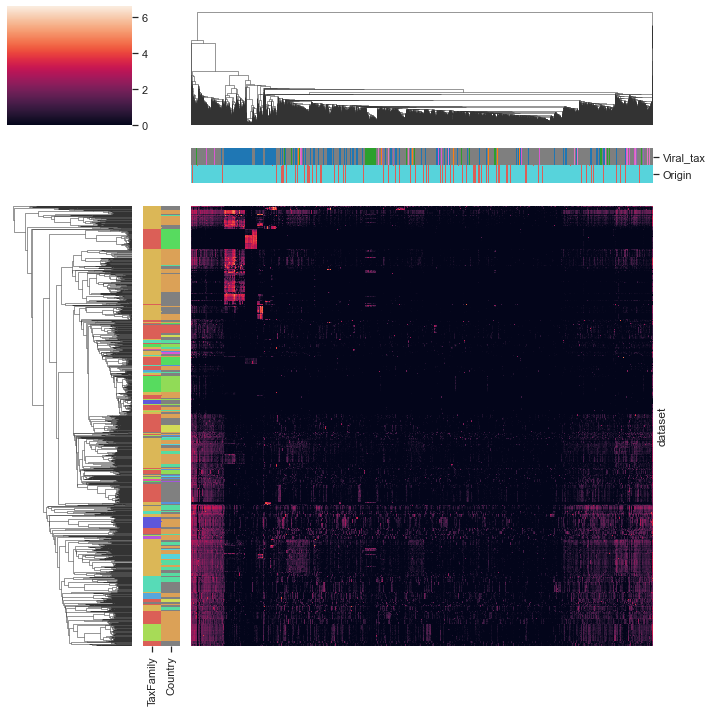

In [19]:
#Plot with all colors ..
plt.figure(figsize=(80,80))
g = sns.clustermap(sradf_denovo_loctax2, row_colors=row_colors, col_colors=col_colors, xticklabels=False,yticklabels=False)
g
#g.savefig('figures/readcounts_SRADENOVO_METADATA.png', dpi=300)

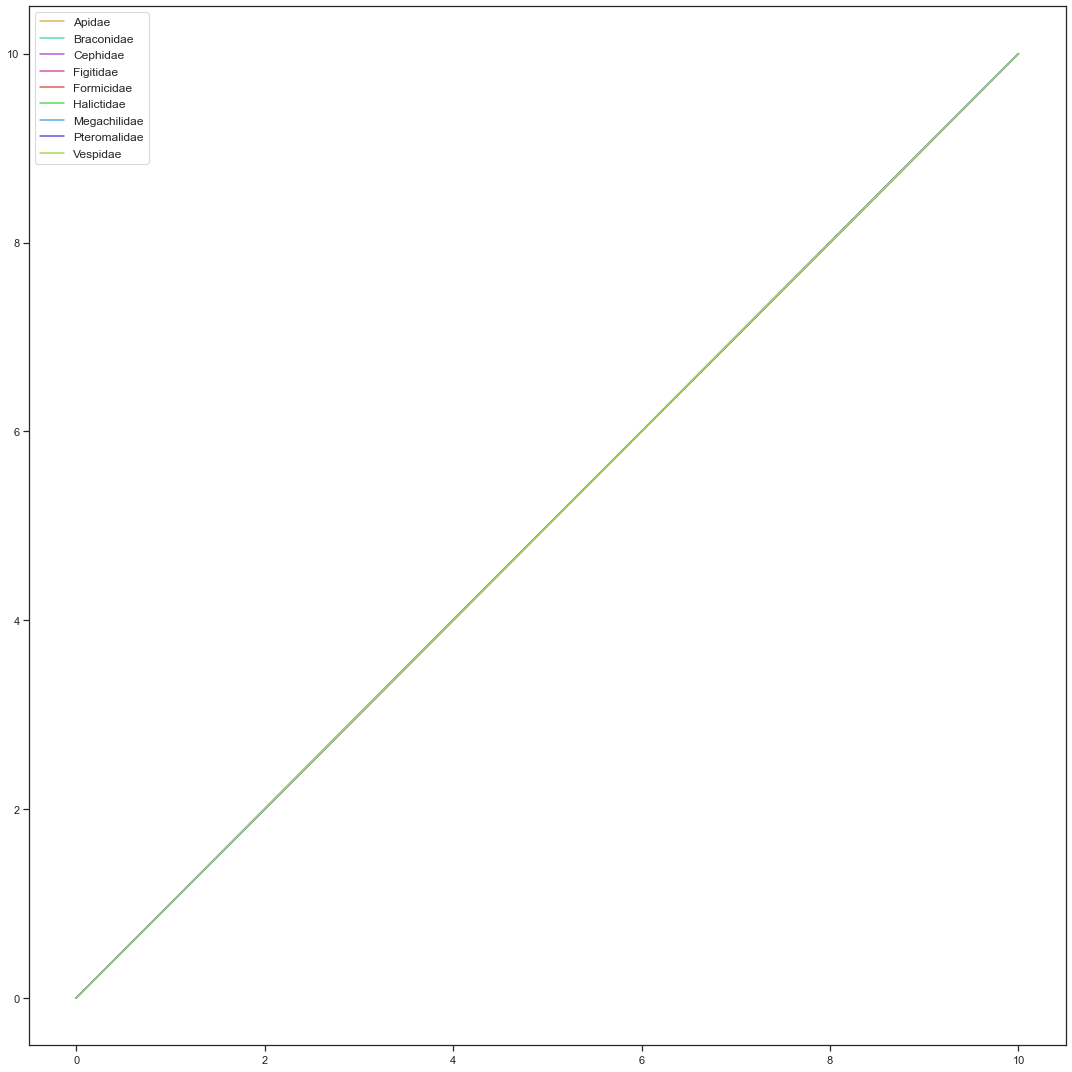

In [20]:
#Tax:
coldic = {
'Formicidae': '#db5f57',
'Apidae': '#dbb757',
'Vespidae': '#a7db57',
'Halictidae': '#57db5f',
'Braconidae': '#57dbb7',
'Megachilidae': '#57a7db',
'Pteromalidae': '#5f57db',
'Cephidae': '#b757db',
'Figitidae': '#db57a7'
}
fig, ax = plt.subplots(figsize=(15,15))
x = np.linspace(0, 10, 1000)
for i in sorted(coldic):
    ax.plot(x,x , '-b', label=i, color=coldic[i])
leg = ax.legend(prop={'size': 12})
#leg.figure.savefig('figures/legend_sra_clustermap_EUkaryotictax.png', dpi=300)

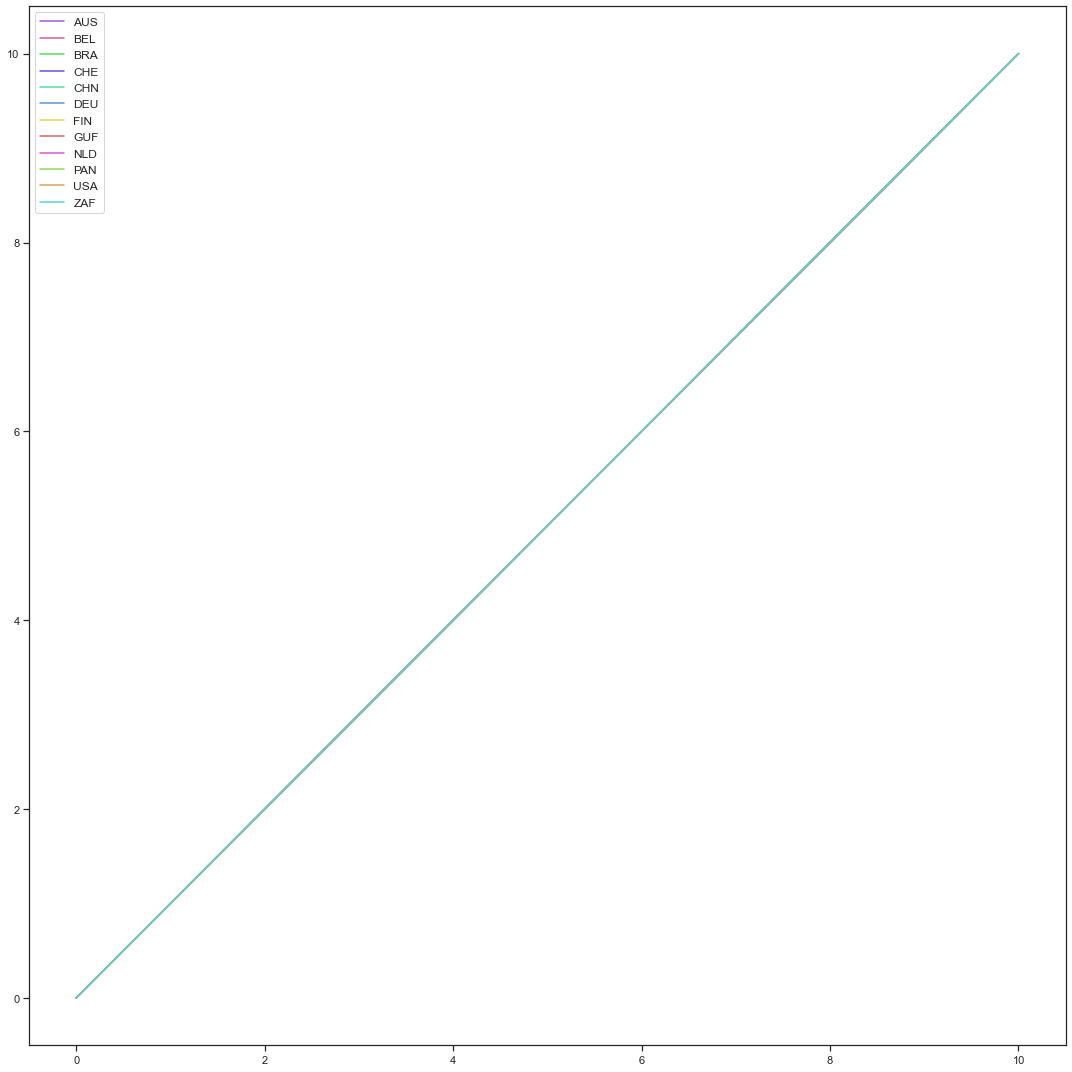

In [21]:
#Country
coldic = {
'GUF' : '#db5f57',
'USA' : '#dba157',
'FIN' : '#d3db57',
'PAN' : '#91db57',
'BRA' : '#57db5f',
'CHN' : '#57dba1',
'ZAF' : '#57d3db',
'DEU' : '#5791db',
'CHE' : '#5f57db',
'AUS' : '#a157db',
'NLD' : '#db57d3',
'BEL' : '#db5791'
}
fig, ax = plt.subplots(figsize=(15,15))
x = np.linspace(0, 10, 1000)
for i in sorted(coldic):
    ax.plot(x,x , '-b', label=i, color=coldic[i])
leg = ax.legend(prop={'size': 12})
#leg.figure.savefig('figures/legend_sra_clustermap_Countrytax.png', dpi=300)